<a href="https://colab.research.google.com/github/RamidNazarov/FetalHealthClassification/blob/main/fetal_health_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os



In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgb

# Loading Dataset

Data This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes

  1. Normal
  2. Suspect
  3. Pathalogical

In [10]:
df = pd.read_csv('fetal_health.csv')

In [11]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# Checking for number of missing values in each column

In [18]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

# Description of the Data

In [19]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Since the mean and median of all the columns are similar we have good quality data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

we have 21 features and One Label column

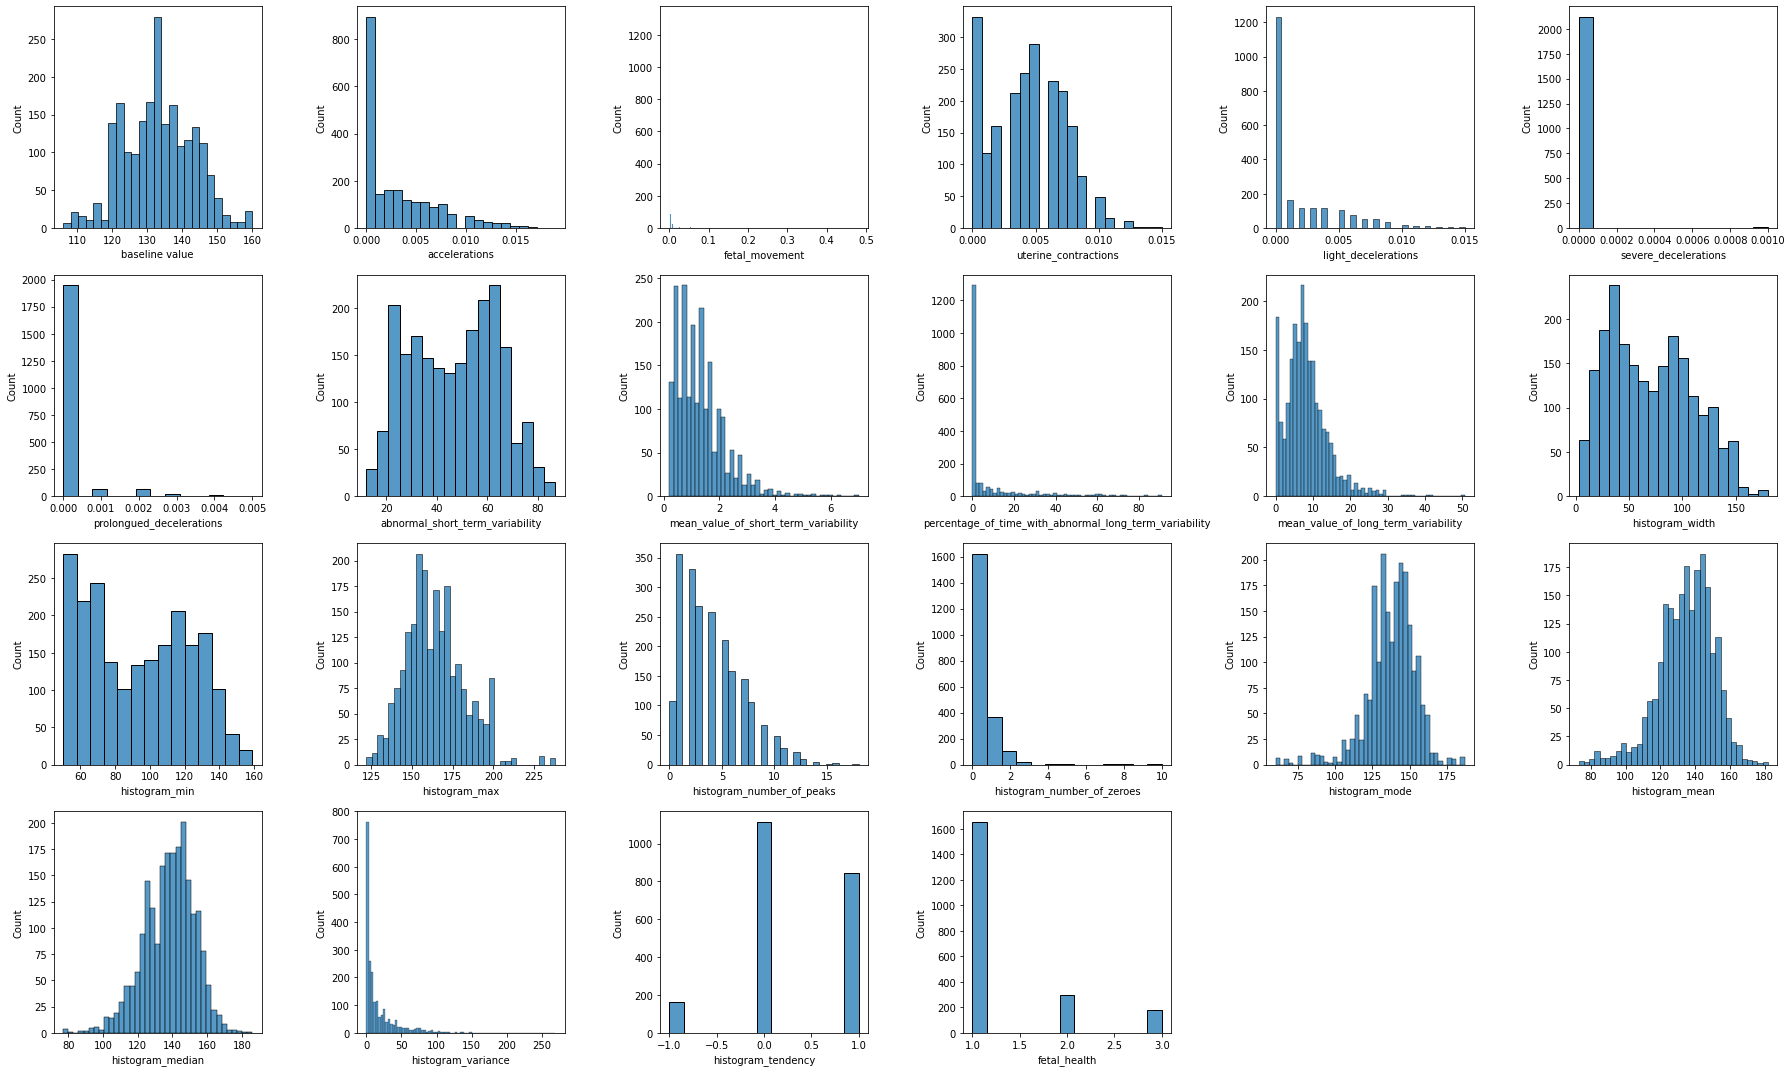

In [24]:
plt.figure(figsize=(25,15))

for i, column in enumerate(df.columns):
  plt.subplot(4,6,i+1)
  sns.histplot(data=df[column])

plt.tight_layout()
plt.show()

In [33]:
(df > 0).all(1)

0       False
1       False
2       False
3       False
4       False
        ...  
2121    False
2122    False
2123    False
2124    False
2125    False
Length: 2126, dtype: bool

# **Looking for outliers in the data**

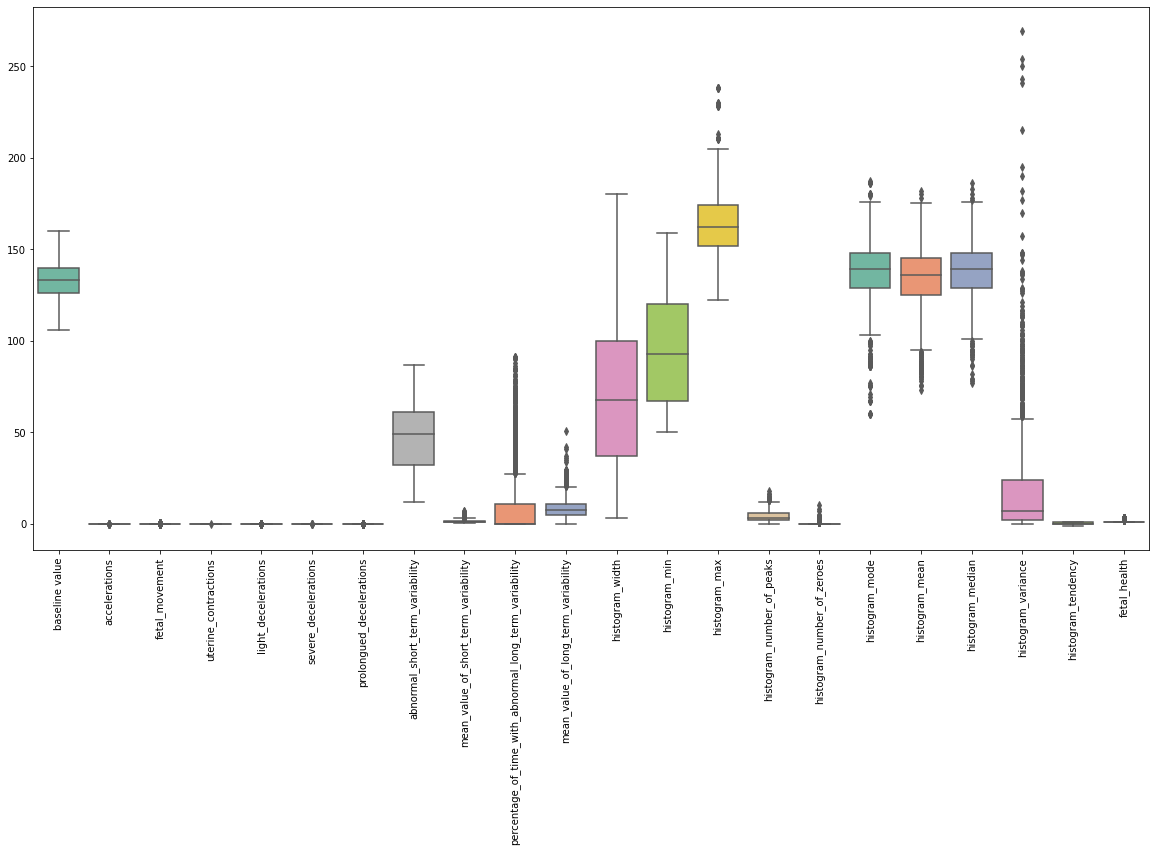

In [43]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, palette = 'Set2')
plt.xticks(rotation=90)
plt.show()

A lot of Outliers are still present in the dataset

In [44]:
# Function to set upper and lower bound to 3rd standard deviation and remove outliers

def removeOutlier(att, df):

  lowerbound = att.mean() - 3*att.std()
  upperbound = att.mean() + 3*att.std()
  print('lowerbound: ', lowerbound, '-------- upperbound: ', upperbound)

  df1 = df[(att > lowerbound) & (att < upperbound)]

  print((df.shape[0] - df1.shape[0]), 'Number of outliers from', df.shape[0])

  print('*****************************************\n')

  df = df1.copy()

  return df


In [53]:
df = removeOutlier(df.histogram_variance, df)
df = removeOutlier(df.mean_value_of_short_term_variability, df)
df = removeOutlier(df.percentage_of_time_with_abnormal_long_term_variability, df)
df = removeOutlier(df.histogram_mode, df)
df = removeOutlier(df.histogram_median, df)
df = removeOutlier(df.histogram_variance, df)
df = removeOutlier(df.histogram_max, df)



lowerbound:  -24.037028065823396 -------- upperbound:  45.072679731515976
16 Number of outliers from 1711
*****************************************

lowerbound:  -0.6846145650717128 -------- upperbound:  3.0262074854256995
2 Number of outliers from 1695
*****************************************

lowerbound:  -31.717881794621093 -------- upperbound:  47.19455043017928
37 Number of outliers from 1693
*****************************************

lowerbound:  99.66528883578182 -------- upperbound:  177.86611213040175
1 Number of outliers from 1656
*****************************************

lowerbound:  101.87039289955146 -------- upperbound:  176.83051344485943
0 Number of outliers from 1655
*****************************************

lowerbound:  -22.75190973484613 -------- upperbound:  43.42864689496698
15 Number of outliers from 1655
*****************************************

lowerbound:  115.60955951590671 -------- upperbound:  207.6038551182396
0 Number of outliers from 1640
************

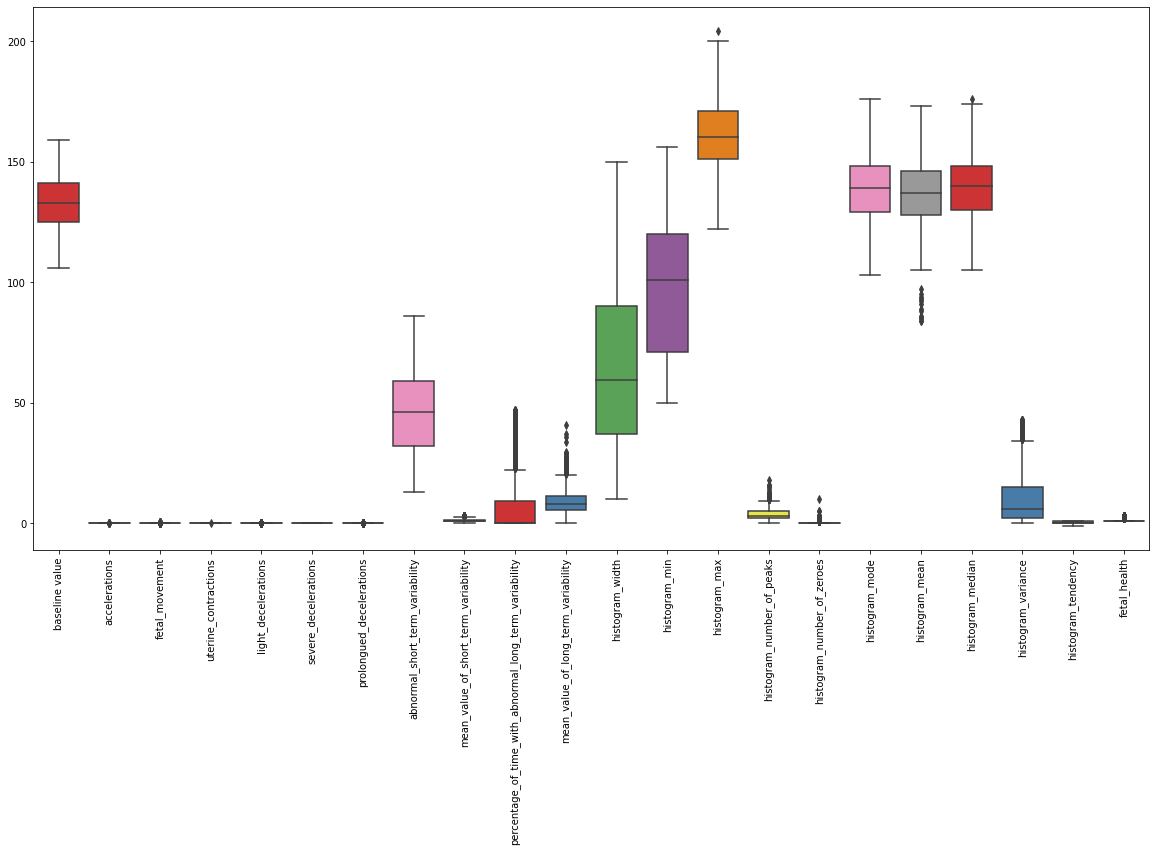

In [55]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

In [54]:
df.shape

(1640, 22)

# Correlation Heatmap

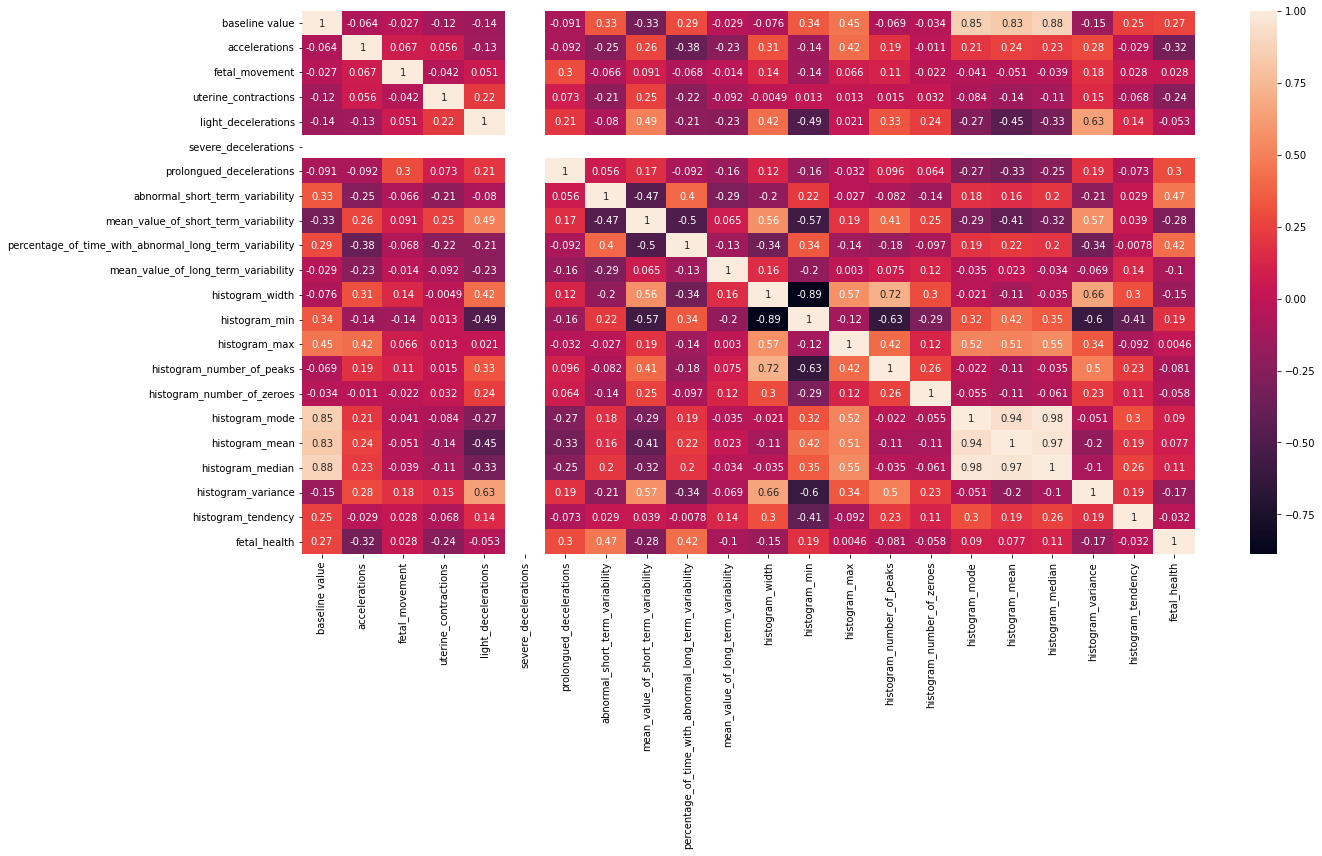

In [58]:
plt.figure(figsize=(20,10))
g = sns.heatmap(df.corr(),annot = True)

# **Distribution of Target class: Highly imbalanced**

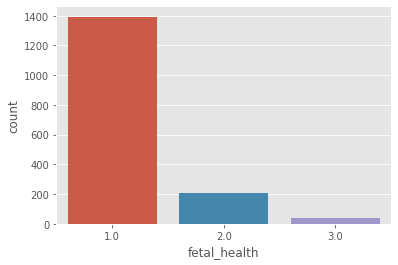

In [77]:
sns.countplot(x='fetal_health', data=df)
plt.show()

Balanced Dataset:

In [78]:
df.fetal_health.value_counts()

1.0    1393
2.0     210
3.0      37
Name: fetal_health, dtype: int64

In [79]:
from sklearn.utils import resample

df_1 = df[df.fetal_health==1]
df_2 = df[df.fetal_health==2]
df_3 = df[df.fetal_health==3]

df_2_upsampled = resample(df_2, replace=True, n_samples=1393, random_state=123)

df_3_upsampled = resample(df_3, replace=True, n_samples=1393, random_state=123)

df_upsampled = pd.concat([df_1, df_2_upsampled, df_3_upsampled])

df_upsampled.fetal_health.value_counts()

1.0    1393
2.0    1393
3.0    1393
Name: fetal_health, dtype: int64

Since we have sufficient data, Oversampling is done to give better accuracy. Here we duplicate examples from the minority class

# **Seperating Features and Target Variable**

In [80]:
x = df_upsampled.drop('fetal_health', axis=1)
y = df_upsampled['fetal_health']
x.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
12,131.0,0.005,0.072,0.008,0.003,0.0,0.0,28.0,1.4,0.0,...,66.0,88.0,154.0,5.0,0.0,135.0,134.0,137.0,7.0,1.0


## Splitting the Dataset

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

# Feature Scaling: Standardization

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create function to compare accuracy measures for various algorithms

In [83]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from mlxtend.plotting import plot_confusion_matrix

def evaluator(y_test, y_pred):

  print('Accuracy is: ', accuracy_score(y_test, y_pred))
  print('')
  print('Classification Report: \n', classification_report(y_test, y_pred))
  print("Confusion Matrix: \n\n")
  plt.style.use('ggplot')
  cm = confusion_matrix(y_test, y_pred)
  plot_confusion_matrix(conf_mat = cm, figsize=(8,6), show_normed=True)




In [84]:
model_accuracy = pd.DataFrame(columns=['Model', 'Accuracy'])
models = {
    'KNN' : KNeighborsClassifier(),
    'DT' : DecisionTreeClassifier(),
    'RFC' : RandomForestClassifier(),
    'GBC' : GradientBoostingClassifier(),
    'XGB' : XGBClassifier()
}

for test, clf in models.items():
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  train_pred = clf.predict(x_train)
  train_acc = accuracy_score(y_train, train_pred)
  print("\n", test + ' scores')
  print(acc)
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print('*' * 100,"\n")
  model_accuracy = model_accuracy.append({'Model': test, 'Accuracy': acc, "Train-acc": train_acc}, ignore_index=True)






 KNN scores
0.9531100478468899
              precision    recall  f1-score   support

         1.0       1.00      0.88      0.93       362
         2.0       0.88      0.99      0.93       325
         3.0       0.99      1.00      0.99       358

    accuracy                           0.95      1045
   macro avg       0.96      0.95      0.95      1045
weighted avg       0.96      0.95      0.95      1045

[[317  44   1]
 [  0 321   4]
 [  0   0 358]]
**************************************************************************************************** 


 DT scores
0.9837320574162679
              precision    recall  f1-score   support

         1.0       1.00      0.95      0.98       362
         2.0       0.95      1.00      0.97       325
         3.0       1.00      1.00      1.00       358

    accuracy                           0.98      1045
   macro avg       0.98      0.98      0.98      1045
weighted avg       0.98      0.98      0.98      1045

[[345  17   0]
 [  0 325  

In [85]:
model_accuracy.sort_values(ascending=False, by='Accuracy')

,Model,Accuracy,Train-acc
1,DT,0.983732,0.999681
2,RFC,0.983732,0.999681
3,GBC,0.981818,0.996171
4,XGB,0.979904,0.989789
0,KNN,0.953110,0.974793


In [86]:
from xgboost import XGBClassifier

dt_classifier = XGBClassifier()

dt_classifier.fit(x_train,y_train)

XGBClassifier(objective='multi:softprob')

Accuracy is:  0.9799043062200957

Classification Report: 
               precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       362
         2.0       0.95      0.99      0.97       325
         3.0       0.99      1.00      1.00       358

    accuracy                           0.98      1045
   macro avg       0.98      0.98      0.98      1045
weighted avg       0.98      0.98      0.98      1045

Confusion Matrix: 




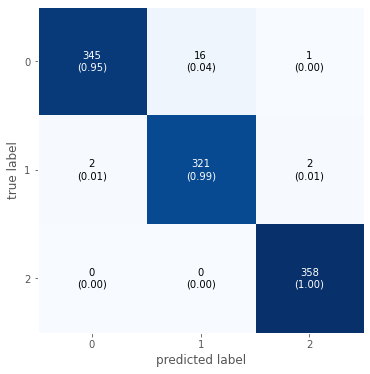

In [87]:
pred_dt = dt_classifier.predict(x_test)
evaluator(y_test, pred_dt)

# Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

rf_classifier.fit(x_train,y_train)

RandomForestClassifier()

Accuracy is:  0.9856459330143541

Classification Report: 
               precision    recall  f1-score   support

         1.0       0.99      0.96      0.98       362
         2.0       0.96      0.99      0.98       325
         3.0       1.00      1.00      1.00       358

    accuracy                           0.99      1045
   macro avg       0.99      0.99      0.99      1045
weighted avg       0.99      0.99      0.99      1045

Confusion Matrix: 




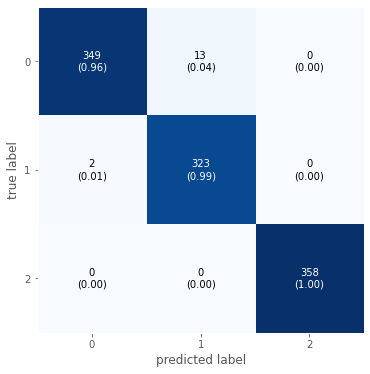

In [89]:
pred_rf = rf_classifier.predict(x_test)

evaluator(y_test, pred_rf)

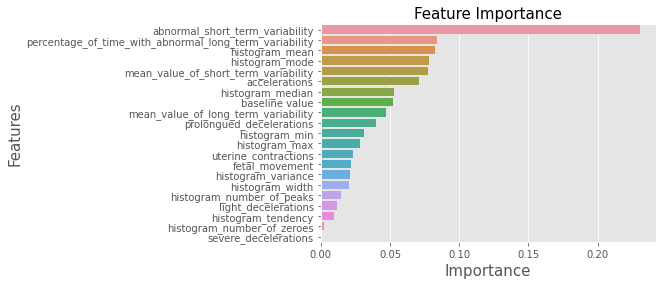

                                             Features  Importance
7                     abnormal_short_term_variability    0.230255
9   percentage_of_time_with_abnormal_long_term_var...    0.084055
17                                     histogram_mean    0.082515
16                                     histogram_mode    0.078040
8                mean_value_of_short_term_variability    0.077581
1                                       accelerations    0.070785
18                                   histogram_median    0.053036
0                                      baseline value    0.052540
10                mean_value_of_long_term_variability    0.046858
6                            prolongued_decelerations    0.039643
12                                      histogram_min    0.030965
13                                      histogram_max    0.028138
3                                uterine_contractions    0.023602
2                                      fetal_movement    0.021774
19        

In [93]:
important_features = pd.DataFrame({'Features': x.columns, 'Importance' : rf_classifier.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x='Importance', y='Features', data=important_features)

plt.title('Feature Importance', fontsize=15)
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Features', fontsize=15)

plt.show()
print(important_features)


In [95]:
input = np.array([[134.0,	0.003,	0.0,	0.008,	0.003,	0.0,	0.0,	16.0,	2.4,	0.0,	23.0,	117.0,	53.0,	170.0,	11.0,	0.0,	137.0,	134.0,	137.0,	13.0,	1.0]])
z=rf_classifier.predict(input)
print(z)

for i in range(len(z)):
  if z[i]== 1:
    print("Normal")
  elif z[i]==2:
    print("Suspect")
  else:
    print("Pathological")

[2.]
Suspect


As seen in the heatmap and the above chart, abnormal_short_term_variability, prolongued decelerations and percentage_of_time_abnormal_long_term_variability do affect fetal health significantly. But RFT has also helped in highlighting other features which are important which we didn't observe during the EDA phase. Also, keeping in mind that this dataset is from the medical field it will be ignorant to drop certain features without seeking advice from a doctor.